# 03. logging 모듈로 로그를 출력하고 관리하기

## logging 모듈 사용하기

In [2]:
from logging import getLogger, Formatter, FileHandler, StreamHandler, DEBUG, ERROR
import requests

# 로거 :  __name__에는 실행 모듈 이름이 들어감(파일 이름)
logger = getLogger(__name__)

# 출력 형식
default_format = '[%(levelname)s] %(asctime)s %(name)s %(filename)s:%(lineno)d %(message)s'
default_formatter = Formatter(default_format)
funcname_formatter = Formatter(default_format + ' (%funcName)s')

# 로그 전용 핸들러 : 콘솔 출력 전용
log_stream_handler = StreamHandler()
log_stream_handler.setFormatter(default_formatter)
log_stream_handler.setLevel(DEBUG)

# 로그 전용 핸들러 : 파일 출력 전용
log_file_handler = FileHandler(filename='crawler.log')
log_file_handler.setFormatter(funcname_formatter)
log_file_handler.setLevel(ERROR)

# 로거에 핸들러와 레벨 설정하기
logger.setLevel(DEBUG)
logger.addHandler(log_stream_handler)
logger.addHandler(log_file_handler)

def logging_example():
    logger.info('크롤링을 시작했습니다.') # info 레벨로 메시지 출력
    logger.warning('외보 사이트 링크는 크롤링하지 않습니다.') # warning 레벨로 메시지 출력
    logger.error('페이지를 찾을 수 없습니다.') # error 레벨로 메시지 출력
    
    try:
        r = requests.get('#invalid_url', timeout=1)
    except requests.exceptions.RequestException as e:
        logger.exception('요청 중에 예외가 발생했습니다. : %r', e)
        
if __name__ == '__main__':
    logging_example()

[INFO] 2021-10-03 15:26:09,449 __main__ <ipython-input-2-abbad0da76d6>:28 크롤링을 시작했습니다.
[INFO] 2021-10-03 15:26:09,449 __main__ <ipython-input-2-abbad0da76d6>:28 크롤링을 시작했습니다.
[WARNING] 2021-10-03 15:26:09,450 __main__ <ipython-input-2-abbad0da76d6>:29 외보 사이트 링크는 크롤링하지 않습니다.
[WARNING] 2021-10-03 15:26:09,450 __main__ <ipython-input-2-abbad0da76d6>:29 외보 사이트 링크는 크롤링하지 않습니다.
[ERROR] 2021-10-03 15:26:09,451 __main__ <ipython-input-2-abbad0da76d6>:30 페이지를 찾을 수 없습니다.
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\master\anaconda3\envs\multi\lib\logging\__init__.py", line 1025, in emit
    msg = self.format(record)
  File "C:\Users\master\anaconda3\envs\multi\lib\logging\__init__.py", line 869, in format
    return fmt.format(record)
  File "C:\Users\master\anaconda3\envs\multi\lib\logging\__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "C:\Users\master\anaconda3\envs\multi\lib\logging\__init__.py", line 580, in formatMessage
    return se

--- Logging error ---
Traceback (most recent call last):
  File "<ipython-input-2-abbad0da76d6>", line 33, in logging_example
    r = requests.get('#invalid_url', timeout=1)
  File "C:\Users\master\anaconda3\envs\multi\lib\site-packages\requests\api.py", line 75, in get
    return request('get', url, params=params, **kwargs)
  File "C:\Users\master\anaconda3\envs\multi\lib\site-packages\requests\api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "C:\Users\master\anaconda3\envs\multi\lib\site-packages\requests\sessions.py", line 528, in request
    prep = self.prepare_request(req)
  File "C:\Users\master\anaconda3\envs\multi\lib\site-packages\requests\sessions.py", line 466, in prepare_request
    hooks=merge_hooks(request.hooks, self.hooks),
  File "C:\Users\master\anaconda3\envs\multi\lib\site-packages\requests\models.py", line 316, in prepare
    self.prepare_url(url, params)
  File "C:\Users\master\anaconda3\envs\multi\lib\site-packages\

## 딕셔너리 형식으로 설정 작성하기
- settings.py

```python
"""설정 파일"""
import os

BASE_DIR = os.path.realpath(os.path.dirname(__file__))
LOG_DIR = os.path.join(BASE_DIR, 'logs')  # 로그 파일 디렉터리

# 로그 파일 디렉터리가 없다면 생성하기
if not os.path.exists(LOG_DIR):
    os.mkdir(LOG_DIR)
LOGGING_CONF = {
    'version': 1,  # 필수
    # logger 설정 처리가 중복되면 덮어씌우기
    'disable_existing_loggers': True,
    # 출력 형식 설정
    'formatters': {
        'default': {  # 디폴트 형식
            '()': 'colorlog.ColoredFormatter',  # colorlog 라이브러리 적용
            'format': '\t'.join([
                "%(log_color)s[%(levelname)s]",  # 로그 레벨
                "asctime:%(asctime)s",  # 로그 출력 날짜
                "process:%(process)d",  # 로그 출력을 실행한 프로세스 이름
                "thread:%(thread)d",  # 로그 출력을 실행한 프로세스 ID
                "module:%(module)s",  # 로그 출력을 실행한 프로세스 모듈 이름
                "%(pathname)s:%(lineno)d",  # 로그 출력을 실행한 모듈의 경로와 줄 번호
                "message:%(message)s",  # 로그 출력할 메시지
            ]),
            'datefmt': '%Y-%m-%d %H:%M:%S',  # asctime으로 출력할 로그 출력 날짜 형식
            # 로그 레벨에 따라 색 적용하기
            'log_colors': {
                'DEBUG': 'bold_black',
                'INFO': 'white',
                'WARNING': 'yellow',
                'ERROR': 'red',
                'CRITICAL': 'bold_red',
            },
        },
        'simple': {  # 로그를 적게 출력하는 간단한 형태의 형식
            '()': 'colorlog.ColoredFormatter',  # pip install colorlog
            'format': '\t'.join([
                "%(log_color)s[%(levelname)s]",
                "%(asctime)s",
                "%(message)s",  # 로그 레벨, 날짜, 메시지만 출력
            ]),
            'datefmt': '%Y-%m-%d %H:%M:%S',
            'log_colors': {
                'DEBUG': 'bold_black',
                'INFO': 'white',
                'WARNING': 'yellow',
                'ERROR': 'red',
                'CRITICAL': 'bold_red',
            },
        },
        'query': {  # SQL 쿼리 출력 전용 형식
            '()': 'colorlog.ColoredFormatter',
            'format': '%(cyan)s[SQL] %(message)s',  # 쿼리만 출력
        },
    },
    # 로그 출력 대상에 따른 핸들러 설정
    'handlers': {
        'file': {  # 파일에 로그를 출력할 핸들러 설정
            'level': 'DEBUG',  # logger.level이 DEBUG 이상일 때만 출력
            # 로그 크기가 일정량을 넘으면 새로운 로그 파일을 생성하는 핸들러
            'class': 'logging.handlers.RotatingFileHandler',
            # 로그 파일 경로 지정
            'filename': os.path.join(LOG_DIR, 'crawler.log'),
            'formatter': 'default',  # 디폴트 형식으로 로그 출력
            'backupCount': 3,  # 오래된 로그 파일은 3개만 남김
            'maxBytes': 1024 * 1024 * 2,  # 로그 크기가 2MB를 넘을 경우 새로운 로그 파일 생성
        },
        'console': {  # 터미널에 로그를 출력하는 핸들러의 로그 형식 지정
            'level': 'DEBUG',
            'class': 'logging.StreamHandler',  # 터미널에 로그를 출력할 핸들러
            'formatter': 'default',  # 디폴트 형식으로 로그 출력
        },
        'console_simple': {  # 터미널에 로그를 출력하는 핸들러의 간단한 로그 형식 지정
            'level': 'DEBUG',
            'class': 'logging.StreamHandler',
            'formatter': 'simple',  # 간단한 형식 지정
        },
        'query': {  # 터미널에 SQL 쿼리 로그를 출력할 핸들러
            'level': 'DEBUG',
            'class': 'logging.StreamHandler',
            'formatter': 'query',  # SQL 쿼리 출력 전용 형식
        },
    },
    'root': {  # 디폴트 설정
        'handlers': ['file', 'console_simple'],  # 위에 설정한 file, console 설정으로 출력
        'level': 'DEBUG',
    },
    # 로그 이름, 핸들러, 로그 레벨 설정
    'loggers': {
        # logging.getLogger(__name__)의 __name__으로 참조되는 이름이 키로 사용됨
        'celery': {
            'handlers': ['console', 'file'],
            'level': 'WARNING',  # Celery 로그는 WARNING 이상만 출력
            'propagate': False,  # 로그 이벤트를 루트 로거에 전달하지 않게 지정
        },
        'my_project': {  # my_project.py 모듈에서 사용할 때의 로거
            'handlers': ['console', 'file'],
            'level': 'DEBUG',
            'propagate': False,
        },
    },
}
```

- my_logging.py

```python
"""로그 전용 모듈"""
import logging.config

import settings

def get_my_logger(name):
    logging.config.dictConfig(settings.LOGGING_CONF)
    return logging.getLogger(name)

logger = get_my_logger(__name__)

if __name__ == '__main__':
    """my_logging를 사용해봅니다."""
    logger.debug('DEBUG 레벨입니다.')
    logger.info('INFO 레벨입니다.')
    logger.warning('WARNING 레벨입니다.')
    logger.error('ERROR 레벨입니다.')
    logger.critical('CRITICAL 레벨입니다.')
```

- my_logging.py 실행 결과
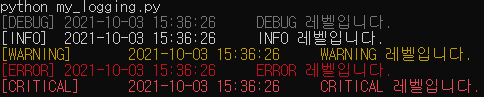